In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#load dataset
df=pd.read_csv("C:\\Users\\Admin\\Desktop\\IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      sepal_length  sepal_width  petal_length  petal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]>

<Axes: >

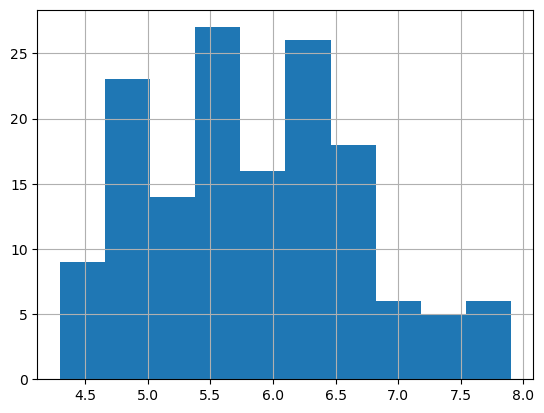

In [9]:
df["sepal_length"].hist()

<Axes: >

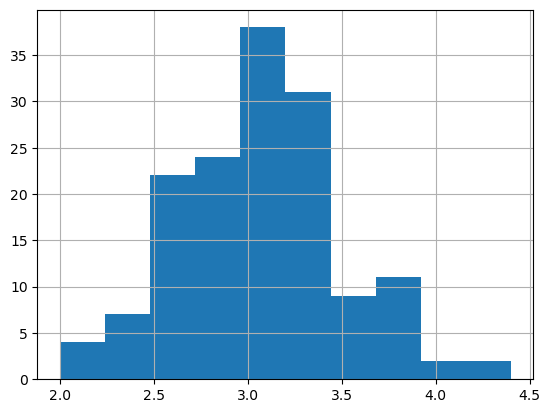

In [10]:
df["sepal_width"].hist()

<Axes: >

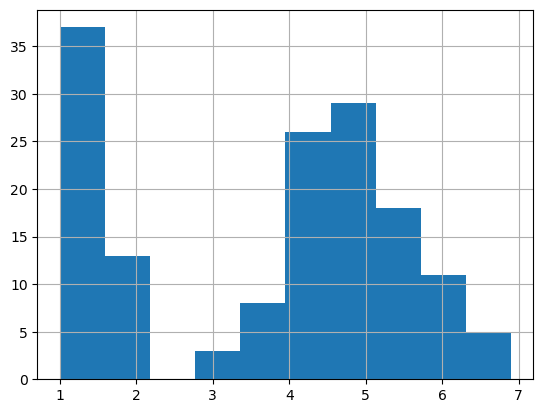

In [11]:
df["petal_length"].hist()

<Axes: >

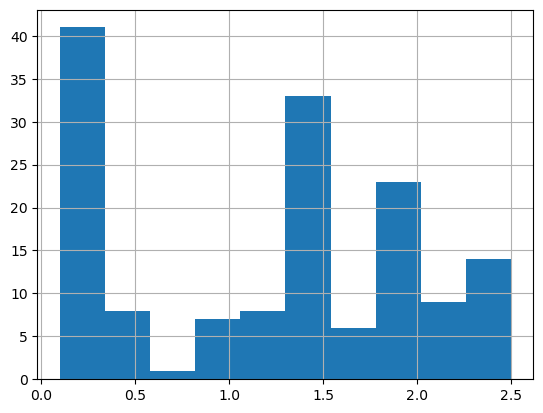

In [12]:
df["petal_width"].hist()

In [13]:
colors=["red","orange","blue"]
species=["Iris-setosa","Iris-versicolor","Iris-virginica" ]

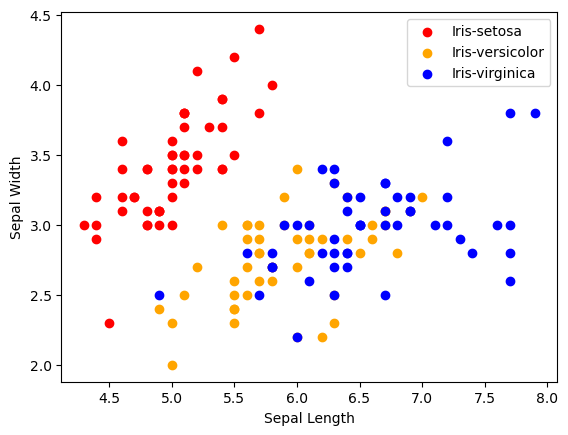

In [15]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x["sepal_length"],x["sepal_width"],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

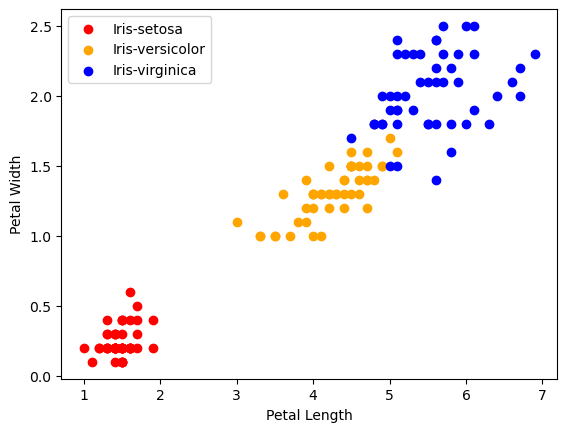

In [16]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x["petal_length"],x["petal_width"],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

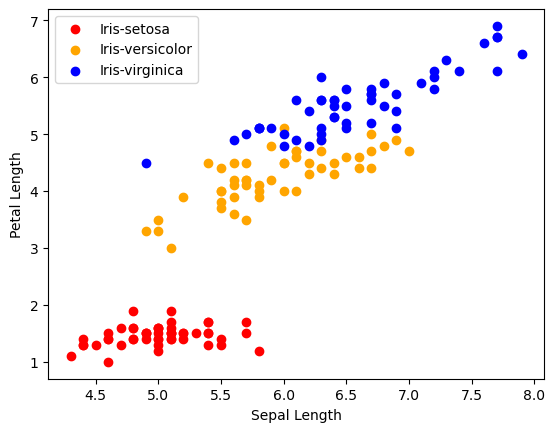

In [17]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x["sepal_length"],x["petal_length"],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

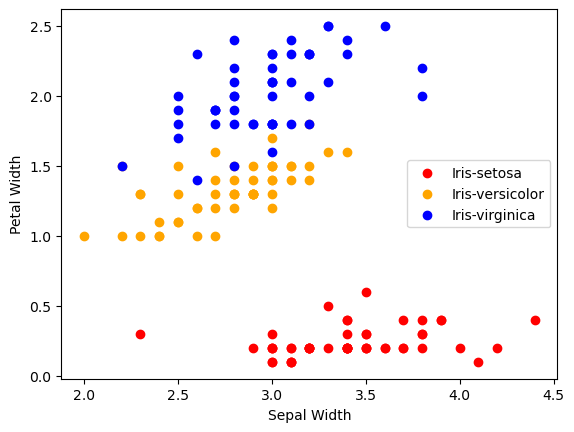

In [18]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x["sepal_width"],x["petal_width"],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [19]:
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5152\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_5152\1969007846.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

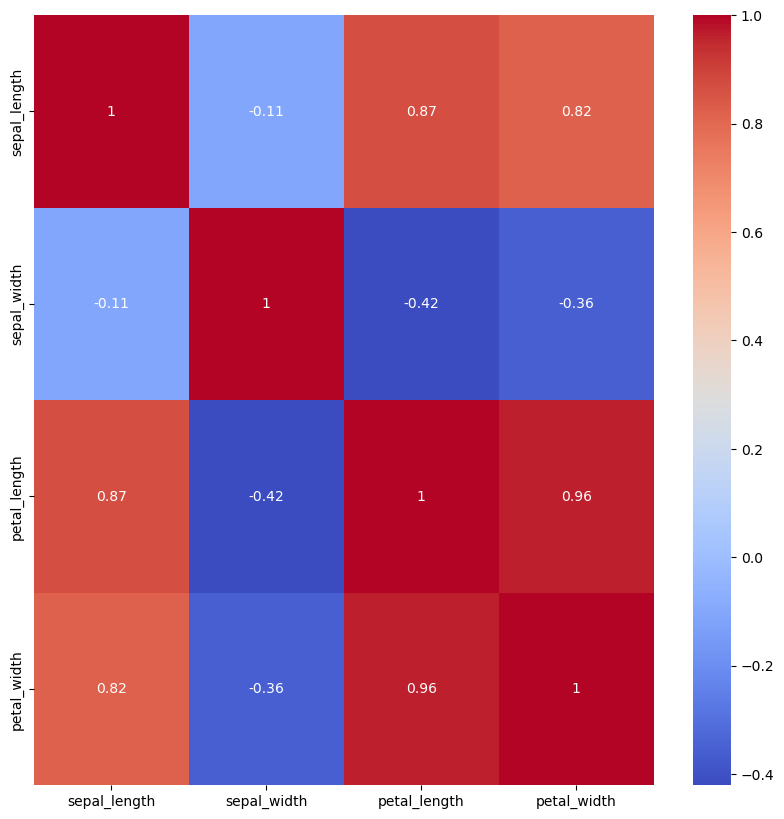

In [21]:
corr=df.corr()
fig,ax =plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax,cmap="coolwarm")

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
Y=df['species']
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.30)

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [29]:
model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [31]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()


In [32]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [35]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [36]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0
